In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn import preprocessing
%matplotlib inline

In [2]:
pd.set_option('max_columns',None)

In [3]:
df = pd.read_csv('./diabetic_data.csv')

As a bit of data cleaning, I'll be binning diagnostic codes here:

In [4]:
df.loc[:,'diag_1':'diag_3']=df.loc[:,'diag_1':'diag_3'].replace(regex={r'^V.*$':1250,r'^E.*$':2000})

df.loc[:,'diag_1':'diag_3']=df.loc[:,'diag_1':'diag_3'].apply(pd.to_numeric,errors='coerce')

df.loc[:,'diag_1':'diag_3']=df.loc[:,'diag_1':'diag_3'].fillna(0.5)

In [5]:
df['diag_1_code']=pd.cut(df['diag_3'],[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760,780,800,1000,1500,2000], \
      labels=['Unknown','ID','Neo','ENMID','Blood','Ment','Nerv','Circ','Resp','Dig','Gen-ur','Preg','Skin','Musc','Congen','Perin','Symp','Inj','Supp-fac','Supp-ext'])
df['diag_2_code']=pd.cut(df['diag_3'],[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760,780,800,1000,1500,2000], \
      labels=['Unknown','ID','Neo','ENMID','Blood','Ment','Nerv','Circ','Resp','Dig','Gen-ur','Preg','Skin','Musc','Congen','Perin','Symp','Inj','Supp-fac','Supp-ext'])
df['diag_3_code']=pd.cut(df['diag_3'],[0,1,140,240,280,290,320,390,460,520,580,630,680,710,740,760,780,800,1000,1500,2000], \
      labels=['Unknown','ID','Neo','ENMID','Blood','Ment','Nerv','Circ','Resp','Dig','Gen-ur','Preg','Skin','Musc','Congen','Perin','Symp','Inj','Supp-fac','Supp-ext'])

#### I'm going to start off with a lot of EDA - if you would prefer to skip that, you can just jump straight to the [modeling section](#modeling)

#### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.isnull().values.any()

False

In [7]:
description=df.describe()

In [8]:
description

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


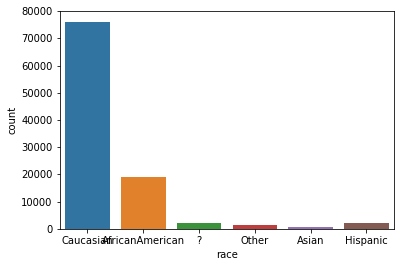

In [35]:
sns.countplot(x='race',data=df)

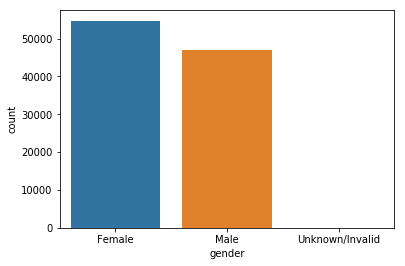

In [36]:
sns.countplot(x='gender',data=df)

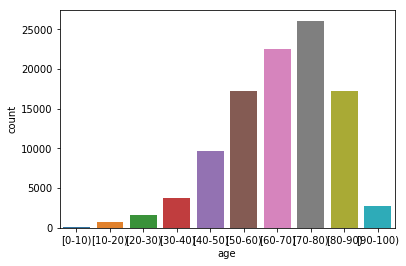

In [52]:
sns.countplot(x='age',data=df)

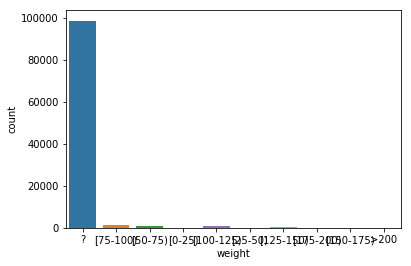

In [37]:
sns.countplot(x='weight',data=df)

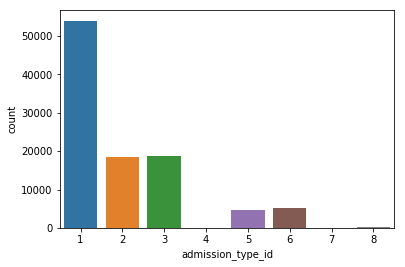

In [15]:
sns.countplot(x='admission_type_id',data=df)

1 - Emergency  
2 - Urgent  
3 - Elective  
4 - Newborn  
5 - Trauma center  
See IDs_mapping

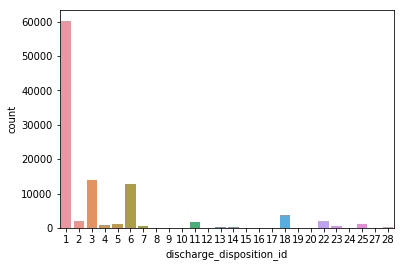

In [16]:
sns.countplot(x='discharge_disposition_id',data=df)

1 - Discharged to home  
2 - To other hospital  
3 - To nursing facility  
4 - To intermediate care facility  
5 - To another type of institution for inpatient care  
6 - To home care of organized home health service organization  
7 - Left against medical advice or discontinued care  
8 - To home with IV drug provider  
9 - Admitted as an inpatient to this hospital  
20 - Expired  
See IDs_mapping

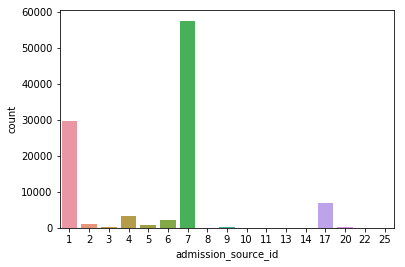

In [17]:
sns.countplot(x='admission_source_id',data=df)

1 - Physician Referral  
2 - Admitted by recommendation of this facility's clinic physician  
3 - HMO referral  
4 - Transfer from different facility  
5 - Transfer from SNF or ICF  
6 - Transfer from another health care facility  
7 - Emergency room  
8 - Court/law enforcement  
9 - Not available  
See IDs_mapping

In [39]:
df.loc[:,'medical_specialty'].value_counts()

?                                    49949
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Pediatrics                             254
Hematology/Oncology                    207
Neurology                              203
Pediatrics-

##### Below, I looked at reducing skewness in some variables using the Box-Cox transformation

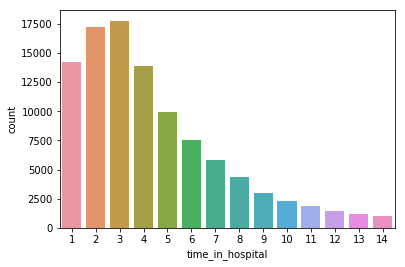

In [38]:
sns.countplot(x='time_in_hospital',data=df)

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


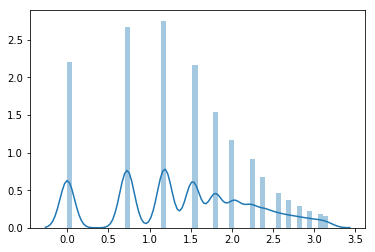

In [198]:
from scipy.stats import boxcox
meds_trans,lmda=boxcox(df['time_in_hospital'])
sns.distplot(meds_trans)

In [199]:
lmda

0.1345269137420941

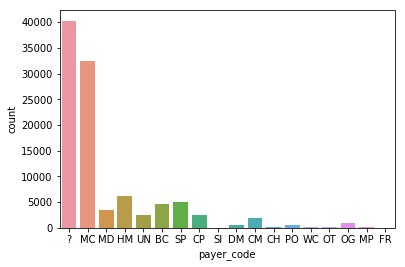

In [18]:
sns.countplot(x='payer_code',data=df)

MC - Medicare  
MD - Medicaid  
HM - Health Maintenance Organization  
BC - Blue Cross??  
SP - Self Pay  
CH - CHAMPUS  
Look for more later

May want to break down specialties into coarser categories later

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


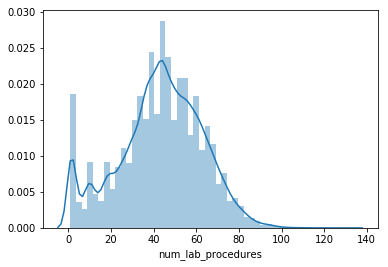

In [55]:
sns.distplot(df['num_lab_procedures'])

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


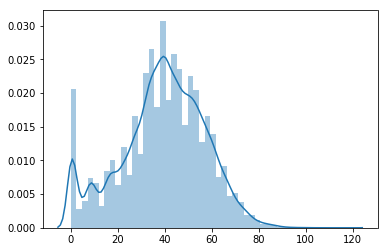

In [196]:
from scipy.stats import boxcox
labs_trans,lmda=boxcox(df['num_lab_procedures'])
sns.distplot(labs_trans)

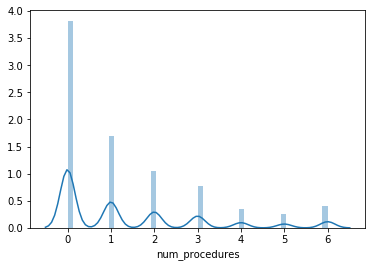

In [56]:
sns.distplot(df['num_procedures'])

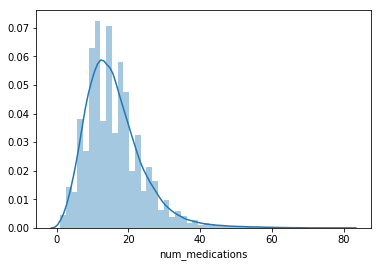

In [57]:
sns.distplot(df['num_medications'])

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


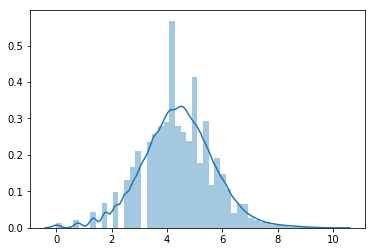

In [193]:
from scipy.stats import boxcox
meds_trans,lmda=boxcox(df['num_medications'])
sns.distplot(meds_trans)

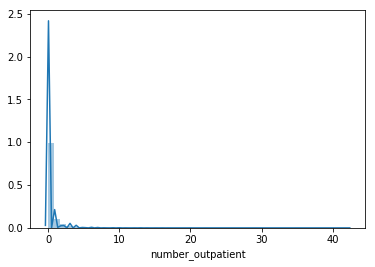

In [58]:
sns.distplot(df['number_outpatient'])

In [171]:
# df['number_outpatient'].value_counts()

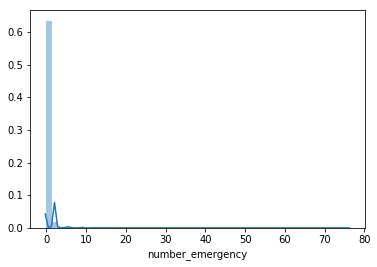

In [59]:
sns.distplot(df['number_emergency'])

/home/joele119/anaconda2/envs/data_env/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


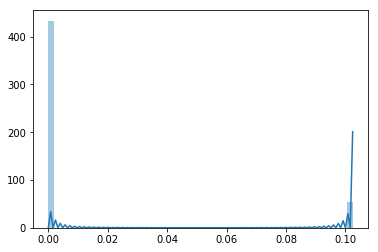

In [201]:
from scipy.stats import boxcox
meds_trans,lmda=boxcox(df['number_emergency']+1)
sns.distplot(meds_trans)

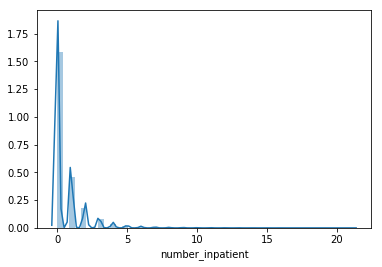

In [60]:
sns.distplot(df['number_inpatient'])

In [169]:
# df['number_inpatient'].value_counts()

Some serious outliers in number of visits

In [168]:
# sns.countplot(x='diag_3',data=df)

The diagnostic codes should maybe be converted into a more concise categorical variable. I'll take a closer look.

In [165]:
# df.loc[:,'diag_1'].value_counts()

In [166]:
# df.loc[:,'diag_2'].value_counts()

In [167]:
# df.loc[:,'diag_3'].value_counts()

Yeah, I think I'll convert these into larger categories

In [77]:
# searchfor=['V','E']
# numeric_diag1=df['diag_1'][~(df['diag_1'].str.contains('|'.join(searchfor),regex=True))]
# numeric_diag2=df['diag_2'][~(df['diag_2'].str.contains('|'.join(searchfor),regex=True))]
# numeric_diag3=df['diag_3'][~(df['diag_3'].str.contains('|'.join(searchfor),regex=True))]

First, convert all V valued codes to 1000 and E valued codes to 2000

Next, bin these numerical codes and give them a categorical label

Now let's examine these diagnostic codes:

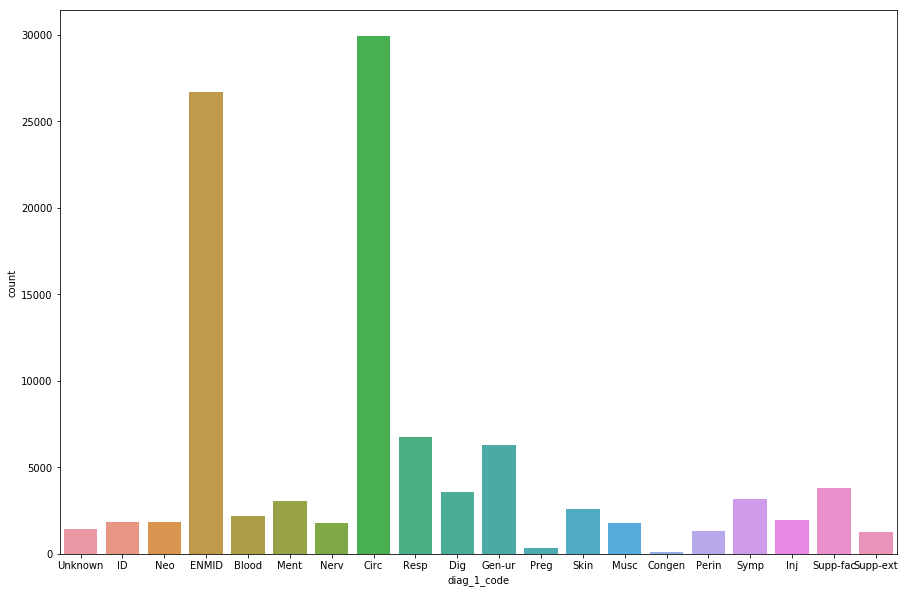

In [10]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(ax=ax,x='diag_1_code',data=df)

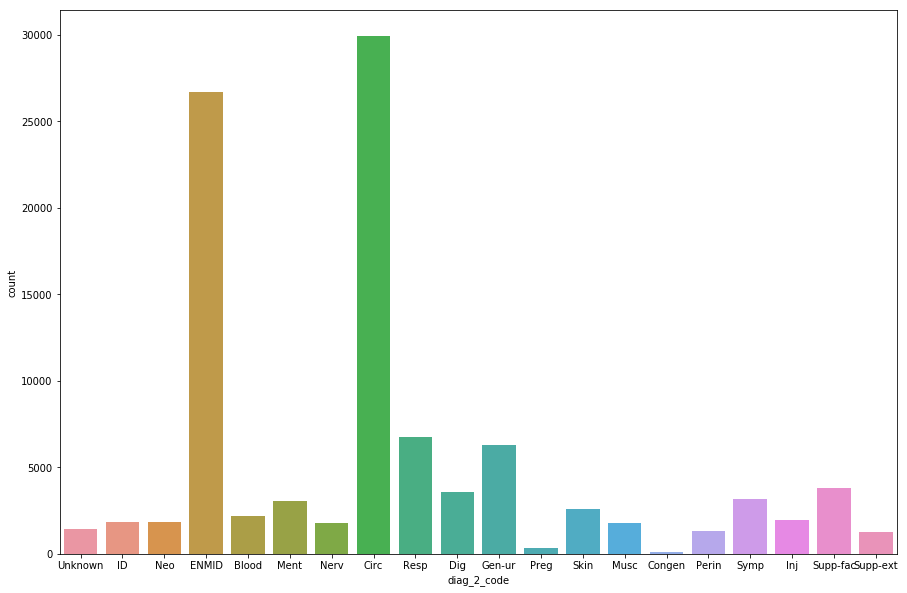

In [163]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(ax=ax,x='diag_2_code',data=df)

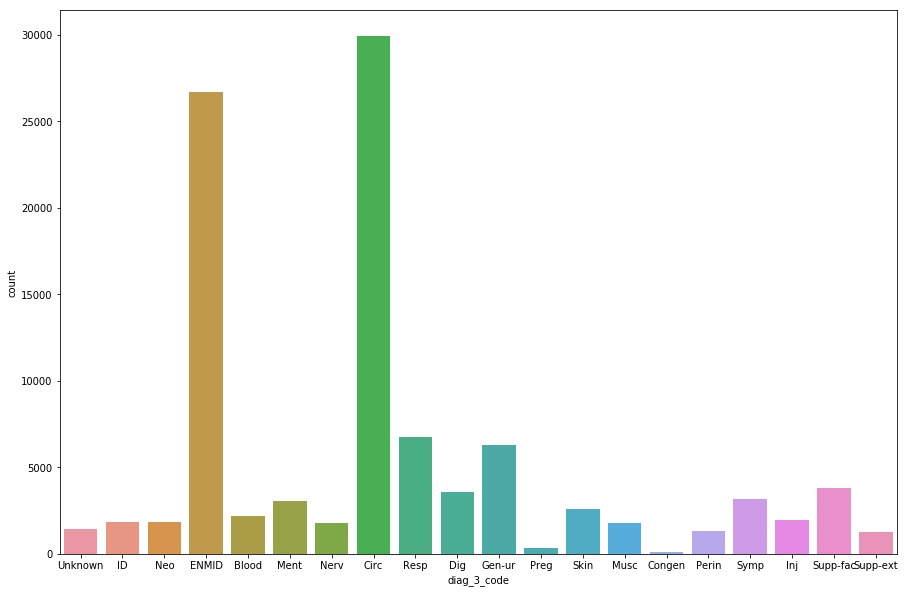

In [164]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(ax=ax,x='diag_3_code',data=df)

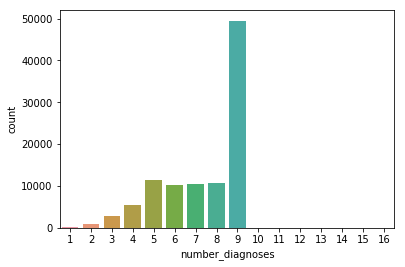

In [49]:
sns.countplot(x='number_diagnoses',data=df)

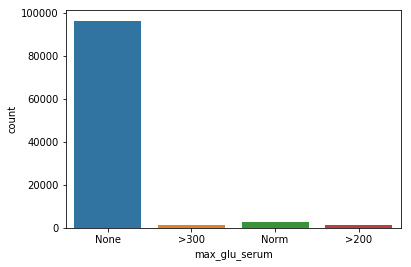

In [50]:
sns.countplot(x='max_glu_serum',data=df)

Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

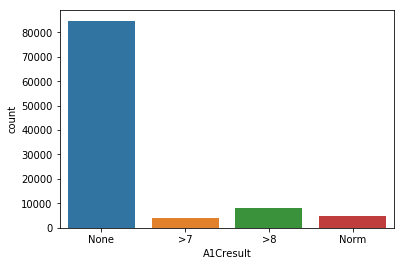

In [51]:
sns.countplot(x='A1Cresult',data=df)

Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

In [14]:
df.loc[:,'metformin':'metformin-pioglitazone'].apply(pd.Series.value_counts)

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
Down,575,45,11,1,194,NaN,560,564,NaN,118,87,3,5,NaN,NaN,NaN,NaN,12218,6,NaN,NaN,NaN,NaN
No,81778,100227,101063,101680,96575,101765.0,89080,91116,101743.0,94438,95401,101458,101728,101763.0,101727.0,101766.0,101766.0,47383,101060,101753.0,101765.0,101764.0,101765.0
Steady,18346,1384,668,79,4670,1.0,11356,9274,23.0,6976,6100,295,31,3.0,38.0,NaN,NaN,30849,692,13.0,1.0,2.0,1.0
Up,1067,110,24,6,327,NaN,770,812,NaN,234,178,10,2,NaN,1.0,NaN,NaN,11316,8,NaN,NaN,NaN,NaN


These features indicate whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

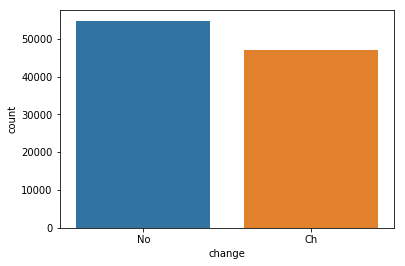

In [41]:
sns.countplot(x='change',data=df)

Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

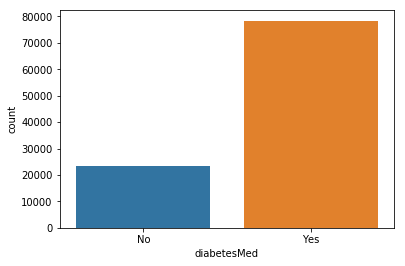

In [44]:
sns.countplot(x='diabetesMed',data=df)

Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

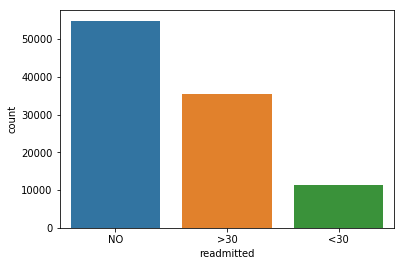

In [45]:
sns.countplot(x='readmitted',data=df)

Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.

Do we ever encounter the same patient more than once?

In [13]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Lengt

Definitely. Let's get back to more boxplots and countplots.

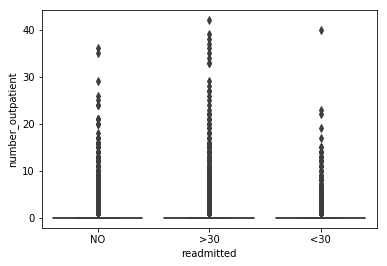

In [19]:
sns.boxplot(x='readmitted',y='number_outpatient',data=df)

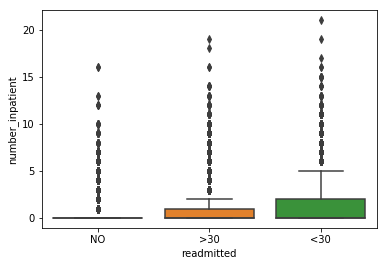

In [20]:
sns.boxplot(x='readmitted',y='number_inpatient',data=df)

If you've been an inpatient once already, you probably will be again. Especially if you've already had a lot of inpatient visits that year.

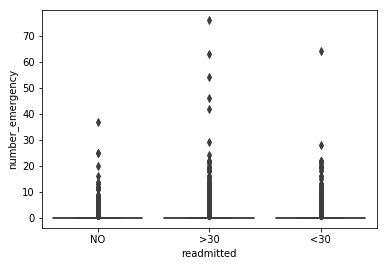

In [21]:
sns.boxplot(x='readmitted',y='number_emergency',data=df)

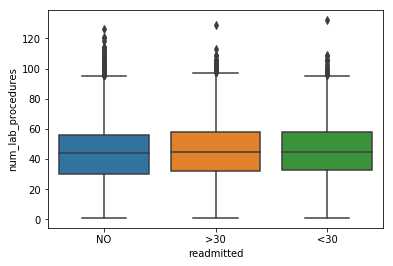

In [22]:
sns.boxplot(x='readmitted',y='num_lab_procedures',data=df)

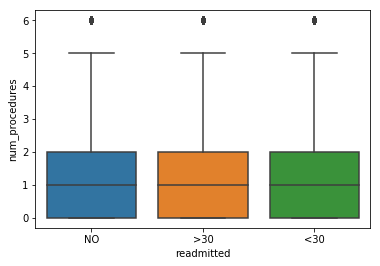

In [23]:
sns.boxplot(x='readmitted',y='num_procedures',data=df)

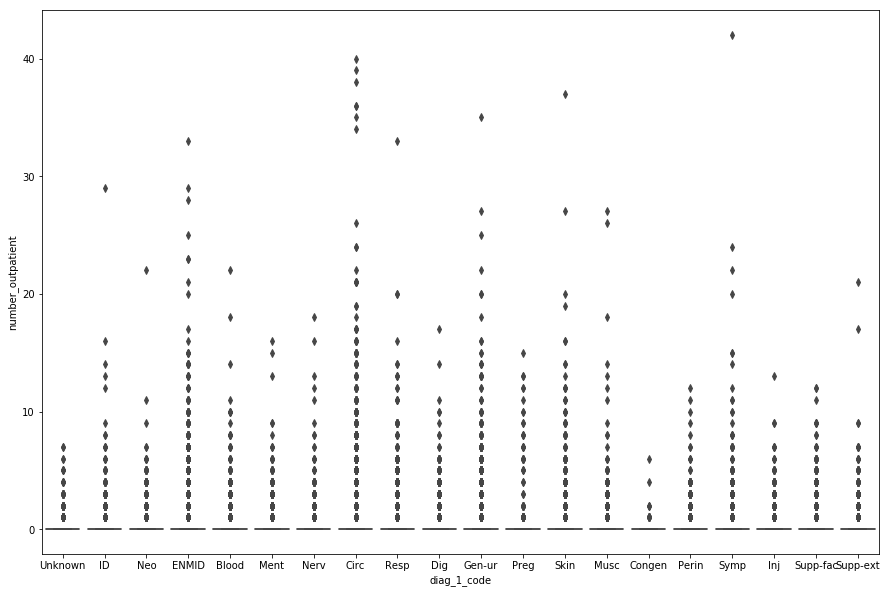

In [27]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x='diag_1_code',y='number_outpatient',data=df)

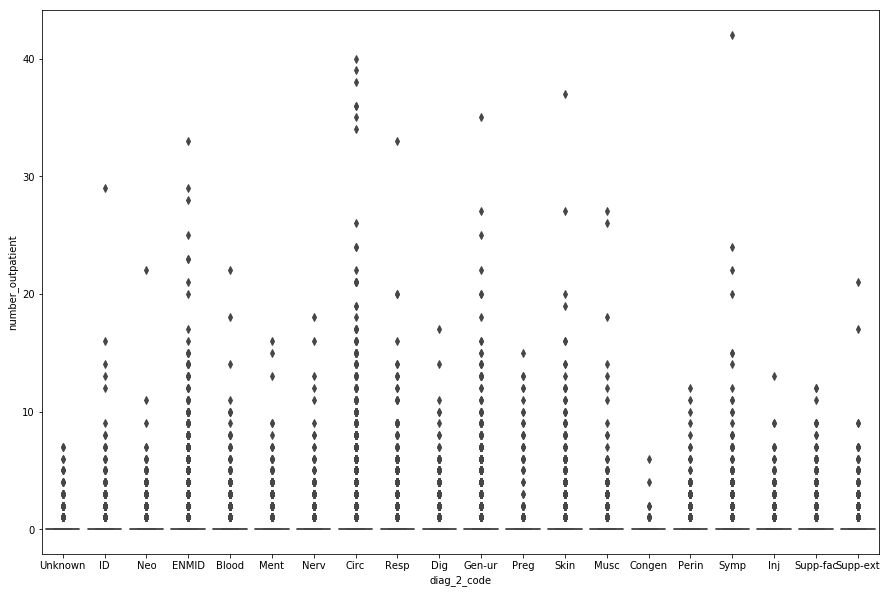

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x='diag_2_code',y='number_outpatient',data=df)

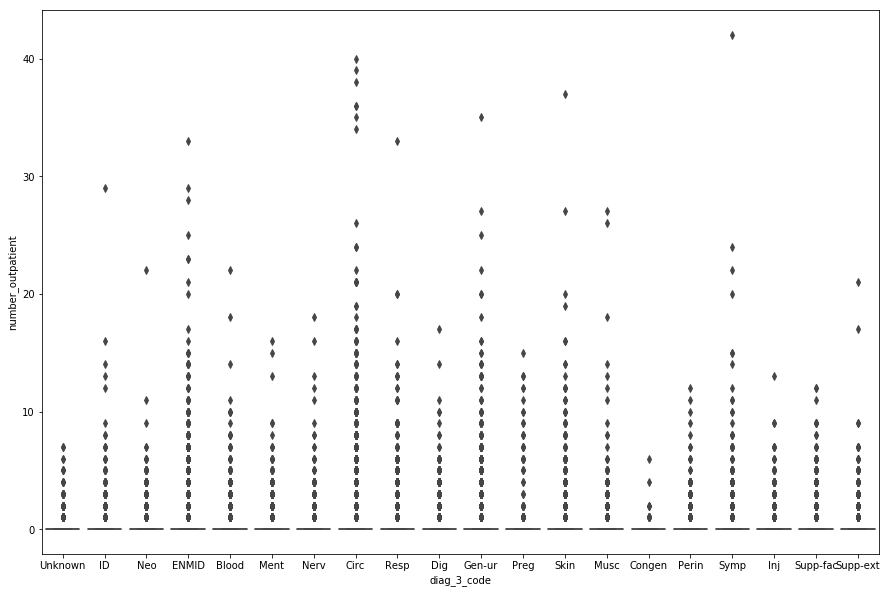

In [29]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(x='diag_3_code',y='number_outpatient',data=df)

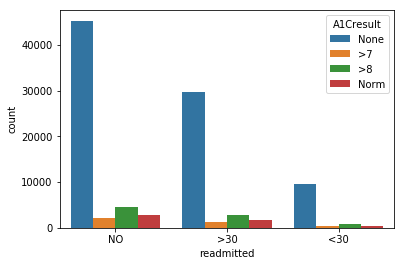

In [35]:
sns.countplot(x='readmitted',hue='A1Cresult',data=df)

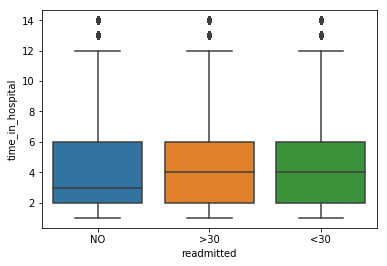

In [37]:
sns.boxplot(x='readmitted',y='time_in_hospital',data=df)

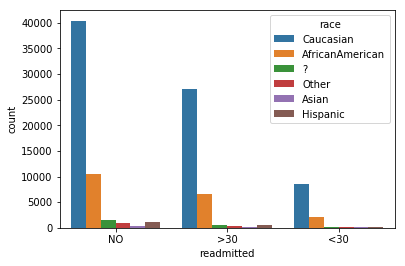

In [41]:
sns.countplot(x='readmitted',hue='race',data=df)

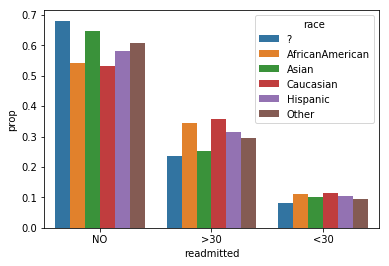

In [57]:
x,y,hue='readmitted','prop','race'
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

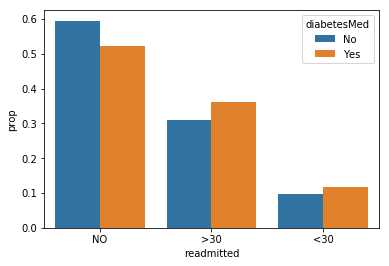

In [60]:
x,y,hue='readmitted','prop','diabetesMed'
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)


In words: 60% of those not prescribed a diabetes medication were not later readmitted, 30% were readmitted in more than 30 days and 10% were readmitted before the month was up.

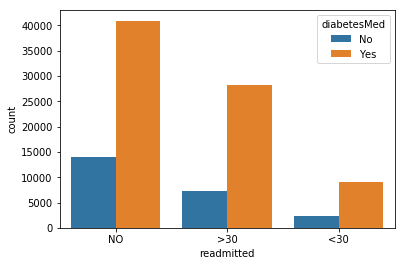

In [61]:
sns.countplot(x='readmitted',hue='diabetesMed',data=df)

##### OK, that was wayyyy too much EDA! Let's move on to modeling and feature engineering

<a id='modeling'></a>

### Modeling

#### Preprocessing

First, I'll define some preprocessing functions

In [6]:
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

def one_hot(df,cols):
    for each in cols:
        dummies = pd.get_dummies(df[each],prefix=each,drop_first=False)
        df = pd.concat([df,dummies],axis=1)
    return df

def transform_diab(df,downsample=True,transform=False):
    cols=df.select_dtypes([object,'category']).columns

    dummy_df=one_hot(df,cols)

    dummy_df.drop(columns=list(set(cols)-set(['readmitted'])),inplace=True)

    # dummy_df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

    dummy_df=one_hot(dummy_df,['admission_type_id','discharge_disposition_id','admission_source_id'])

    dummy_df.drop(columns=['admission_type_id','discharge_disposition_id','admission_source_id','diag_1','diag_2','diag_3'],inplace=True)
    
    if downsample:
        g = dummy_df.groupby('readmitted')
        dummy_df=g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
        
    le=preprocessing.LabelEncoder()
    readmit=le.fit_transform(dummy_df['readmitted'])
        
    dummy_df.drop(columns=['readmitted_NO','readmitted_>30','readmitted_<30','readmitted'],inplace=True)
    if transform:
        dummy_df.loc[:,'time_in_hospital':'num_medications']=dummy_df.loc[:,'time_in_hospital':'num_medications'].apply(boxcox)
    else:
        scaler=MinMaxScaler()
        dummy_df.loc[:,'time_in_hospital':'number_diagnoses']=scaler.fit_transform(dummy_df.loc[:,'time_in_hospital':'number_diagnoses'])
    return dummy_df,readmit

In [7]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

We can see some moderate class imbalance here. We can downsample to remove the class imbalance by setting **downsample=True** in **transform_diab()** 

#### Logistic Regression

As our very first model, let's try out a vanilla logistic regression model. We'll throw it into a GridSearchCV with cv=3, over the hyperparameters C (strength of penalty) and type of penalty (L1 or L2).

In [8]:
import sklearn.linear_model as lm
import sklearn.metrics as met

In [9]:
logreg = lm.LogisticRegression()

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# preprocess the data
dummy_df,readmit=transform_diab(df)

In [12]:
dummy_df.head(10)

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),weight_>200,weight_?,weight_[0-25),weight_[100-125),weight_[125-150),weight_[150-175),weight_[175-200),weight_[25-50),weight_[50-75),weight_[75-100),payer_code_?,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,medical_specialty_?,medical_specialty_AllergyandImmunology,medical_specialty_Anesthesiology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Cardiology,medical_specialty_Cardiology-Pediatric,medical_specialty_DCPTEAM,medical_specialty_Dentistry,medical_specialty_Dermatology,medical_specialty_Emergency/Trauma,medical_specialty_Endocrinology,medical_specialty_Endocrinology-Metabolism,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_Gynecology,medical_specialty_Hematology,medical_specialty_Hematology/Oncology,medical_specialty_Hospitalist,medical_specialty_InfectiousDiseases,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_Neurology,medical_specialty_Neurophysiology,medical_specialty_Obsterics&Gynecology-GynecologicOnco,medical_specialty_Obstetrics,medical_specialty_ObstetricsandGynecology,medical_specialty_Oncology,medical_specialty_Ophthalmology,medical_specialty_Orthopedics,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Osteopath,medical_specialty_Otolaryngology,medical_specialty_OutreachServices,medical_specialty_Pathology,medical_specialty_Pediatrics,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Pediatrics-EmergencyMedicine,medical_specialty_Pediatrics-Endocrinology,medical_specialty_Pediatrics-Hematology-Oncology,medical_specialty_Pediatrics-InfectiousDiseases,medical_specialty_Pediatrics-Neurology,medical_specialty_Pediatrics-Pulmonology,medical_specialty_Perinatology,medical_specialty_PhysicalMedicineandRehabilitation,medical_specialty_PhysicianNotFound,medical_specialty_Podiatry,medical_specialty_Proctology,medical_specialty_Psychiatry,medical_specialty_Psychiatry-Addictive,medical_specialty_Psychiatry-Child/Adolescent,medical_specialty_Psychology,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Radiology,medical_specialty_Resident,medical_specialty_Rheumatology,medical_specialty_Speech,medical_specialty_SportsMedicine,medical_specialty_Surgeon,medical_specialty_Surgery-Cardiovascular,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Surgery-Colon&Rectal,medical_specialty_Surgery-General,medical_specialty_Surgery-Maxillofacial,medical_specialty_Surgery-Neuro,medical_specialty_Surgery-Pediatric,medical_specialty_Surgery-Plastic,medical_specialty_Surgery-PlasticwithinHeadandNeck,medical_specialty_Surgery-Thoracic,medical_specialty_Surgery-Vascular,medical_specialty_SurgicalSpecialty,medical_specialty_Urology,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up

Let's check to see that the response is balanced:

In [13]:
pd.Series(readmit).value_counts()

2    11357
1    11357
0    11357
dtype: int64

Let's make the model and fit to the data:

In [12]:
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 10], 
              'penalty': ['l1','l2']}
gs = GridSearchCV(estimator=logreg, 
                  param_grid=param_grid, 
                  cv=3,
                  verbose=3,
                  n_jobs=3,
                  scoring='f1_micro')

In [13]:
# have to be careful here - patient_nbr and encounter_id shouldn't be used as features
dummy_df.drop(columns=['patient_nbr','encounter_id'],inplace=True)

In [17]:
gs.fit(dummy_df,readmit)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] penalty=l1, C=0.0001 ............................................
[CV] ....... penalty=l1, C=0.0001, score=0.333333333333, total=   0.1s
[CV] penalty=l1, C=0.0001 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ....... penalty=l1, C=0.0001, score=0.333333333333, total=   0.1s
[CV] penalty=l1, C=0.0001 ............................................
[CV] ....... penalty=l1, C=0.0001, score=0.333333333333, total=   0.1s
[CV] penalty=l2, C=0.0001 ............................................
[CV] ....... penalty=l2, C=0.0001, score=0.402799788695, total=   0.2s
[CV] penalty=l2, C=0.0001 ............................................
[CV] ....... penalty=l2, C=0.0001, score=0.400774784293, total=   0.2s
[CV] penalty=l2, C=0.0001 ............................................
[CV] ....... penalty=l2, C=0.0001, score=0.403698811096, total=   0.2s
[CV] penalty=l1, C=0.001 .............................................
[CV] ........ penalty=l1, C=0.001, score=0.386511709808, total=   0.3s
[CV] penalty=l1, C=0.001 .............................................
[CV] ........ penalty=l1, C=0.001, score=0.379908434584, total=   0.3s
[CV] penalty=l1, C=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=3)

In [18]:
gs.best_score_

0.46532241495700155

Let's check this score by running our model on the full dataset:

In [21]:
all_dummy,all_readmit=transform_diab(df,downsample=False)
all_dummy.drop(columns=['patient_nbr','encounter_id'],inplace=True)

In [22]:
pred=gs.predict(all_dummy)

In [23]:
print met.confusion_matrix(all_readmit,pred)

[[ 4954  3273  3130]
 [ 9779 14277 11489]
 [ 9461 13679 31724]]


In [24]:
print met.f1_score(all_readmit,pred,average='micro')

0.5007075054536879


It actually does a little better on the whole dataset.

#### Random Forest

Next, let's try a quick random forest:

In [14]:
from sklearn.ensemble import RandomForestClassifier

/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
rf=RandomForestClassifier()

In [28]:
param_grid = {'n_estimators': [10,20,50,100,200,400], 
              'max_features': ['auto','sqrt']}
grf = GridSearchCV(estimator=rf, 
                  param_grid=param_grid,
                  n_jobs=3,
                  cv=3,verbose=3,scoring='f1_micro')

In [29]:
grf.fit(dummy_df,readmit)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_features=auto, n_estimators=10 ..............................
[CV] max_features=auto, n_estimators=10 ..............................
[CV] max_features=auto, n_estimators=10 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.417855256207, total=   0.7s
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.412836767036, total=   0.7s
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.414883311317, total=   0.7s
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=20, score=0.430885719317, total=   1.3s
[CV]  max_features=auto, n_estimators=20, score=0.429477020602, total=   1.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV] max_features=auto, n_estimators=50 ............

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.0min


[CV]  max_features=sqrt, n_estimators=100, score=0.459235780947, total=   6.4s
[CV] max_features=sqrt, n_estimators=200 .............................
[CV]  max_features=sqrt, n_estimators=100, score=0.457827082233, total=   6.4s
[CV] max_features=sqrt, n_estimators=200 .............................
[CV]  max_features=sqrt, n_estimators=100, score=0.446851607221, total=   6.4s
[CV] max_features=sqrt, n_estimators=200 .............................
[CV]  max_features=sqrt, n_estimators=200, score=0.46117274168, total=  12.8s
[CV] max_features=sqrt, n_estimators=400 .............................
[CV]  max_features=sqrt, n_estimators=200, score=0.462581440394, total=  12.9s
[CV] max_features=sqrt, n_estimators=400 .............................
[CV]  max_features=sqrt, n_estimators=200, score=0.457419638926, total=  12.9s
[CV] max_features=sqrt, n_estimators=400 .............................
[CV]  max_features=sqrt, n_estimators=400, score=0.461348829019, total=  25.5s
[CV]  max_features=sqr

[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 400], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=3)

In [30]:
grf.best_score_

0.46256347040004697

In [31]:
grf.best_params_

{'max_features': 'auto', 'n_estimators': 400}

Again, let's check this score by testing on the whole dataset, but this time using CV on the whole dataset:

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
rf=grf.best_estimator_

In [34]:
cross_val_score(rf,all_dummy,all_readmit,scoring='f1_micro',n_jobs=3)

array([0.56047519, 0.56727198, 0.57268359])

An improvement by about 7% compared to logistic regression - not too shabby!

##### Vanilla modeling summary

All in all, these are not particularly awesome F1-scores. I'm not so sure how far algorithm selection or hyperparameter tuning are going to take us, and before we get too far down that rabbit hole, let's try some automated feature engineering using Featuretools:

#### Feature Engineering

In [15]:
import featuretools as ft

In [16]:
# This time, we'll wait to encode variables until after we've done some Deep Feature Synthesis on our original df
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_code,diag_2_code,diag_3_code
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,0.50,0.5,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Unknown,Unknown,Unknown
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276.00,250.01,255.0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,ENMID,ENMID,ENMID
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648.00,250.00,1250.0,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Supp-fac,Supp-fac,Supp-fac
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8.00,250.43,403.0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Circ,Circ,Circ
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197.00,157.00,250.0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,ENMID,ENMID,ENMID


In [17]:
es = ft.EntitySet("diabetes")

In [18]:
from featuretools import variable_types as vtypes

In [19]:
variable_types = {
    'patient_nbr':vtypes.Categorical,
    'admission_source_id':vtypes.Categorical,
    'admission_type_id':vtypes.Categorical,
    'discharge_disposition_id':vtypes.Categorical,
}

In [20]:
df_drops=df.drop(columns=['readmitted','diag_1','diag_2','diag_3'])

In [21]:
es.entity_from_dataframe(entity_id='diabetes',
                        dataframe=df_drops,
                        index='encounter_id',
                        variable_types=variable_types)

Entityset: diabetes
  Entities:
    diabetes [Rows: 101766, Columns: 49]
  Relationships:
    No relationships

In [22]:
# Since some patients are represented more than once, we set up an entity representation for patients as well
es.normalize_entity(base_entity_id="diabetes",
                   new_entity_id='patient',
                   index='patient_nbr')

Entityset: diabetes
  Entities:
    diabetes [Rows: 101766, Columns: 49]
    patient [Rows: 71518, Columns: 1]
  Relationships:
    diabetes.patient_nbr -> patient.patient_nbr

In [23]:
es['diabetes'].variable_types

{'encounter_id': featuretools.variable_types.variable.Index,
 'race': featuretools.variable_types.variable.Categorical,
 'gender': featuretools.variable_types.variable.Categorical,
 'age': featuretools.variable_types.variable.Categorical,
 'weight': featuretools.variable_types.variable.Categorical,
 'time_in_hospital': featuretools.variable_types.variable.Numeric,
 'payer_code': featuretools.variable_types.variable.Categorical,
 'medical_specialty': featuretools.variable_types.variable.Categorical,
 'num_lab_procedures': featuretools.variable_types.variable.Numeric,
 'num_procedures': featuretools.variable_types.variable.Numeric,
 'num_medications': featuretools.variable_types.variable.Numeric,
 'number_outpatient': featuretools.variable_types.variable.Numeric,
 'number_emergency': featuretools.variable_types.variable.Numeric,
 'number_inpatient': featuretools.variable_types.variable.Numeric,
 'number_diagnoses': featuretools.variable_types.variable.Numeric,
 'max_glu_serum': featureto

In [24]:
es.add_interesting_values(verbose=True)

2018-09-27 14:17:51,831 featuretools.entityset - INFO    Variable race: Marking Caucasian as an interesting value
2018-09-27 14:17:51,831 featuretools.entityset - INFO    Variable race: Marking AfricanAmerican as an interesting value
2018-09-27 14:17:51,832 featuretools.entityset - INFO    Variable race: Marking ? as an interesting value
2018-09-27 14:17:51,832 featuretools.entityset - INFO    Variable race: Marking Hispanic as an interesting value
2018-09-27 14:17:51,832 featuretools.entityset - INFO    Variable race: Marking Other as an interesting value
2018-09-27 14:17:51,848 featuretools.entityset - INFO    Variable gender: Marking Female as an interesting value
2018-09-27 14:17:51,848 featuretools.entityset - INFO    Variable gender: Marking Male as an interesting value
2018-09-27 14:17:51,849 featuretools.entityset - INFO    Variable gender: Marking Unknown/Invalid as an interesting value
2018-09-27 14:17:51,859 featuretools.entityset - INFO    Variable age: Marking [70-80) as a

2018-09-27 14:17:52,043 featuretools.entityset - INFO    Variable pioglitazone: Marking Down as an interesting value
2018-09-27 14:17:52,052 featuretools.entityset - INFO    Variable rosiglitazone: Marking No as an interesting value
2018-09-27 14:17:52,052 featuretools.entityset - INFO    Variable rosiglitazone: Marking Steady as an interesting value
2018-09-27 14:17:52,053 featuretools.entityset - INFO    Variable rosiglitazone: Marking Up as an interesting value
2018-09-27 14:17:52,053 featuretools.entityset - INFO    Variable rosiglitazone: Marking Down as an interesting value
2018-09-27 14:17:52,063 featuretools.entityset - INFO    Variable acarbose: Marking No as an interesting value
2018-09-27 14:17:52,063 featuretools.entityset - INFO    Variable acarbose: Marking Steady as an interesting value
2018-09-27 14:17:52,064 featuretools.entityset - INFO    Variable acarbose: Marking Up as an interesting value
2018-09-27 14:17:52,064 featuretools.entityset - INFO    Variable acarbose: 

In [27]:
# All right, let's make some new features!
feature_matrix,features = ft.dfs(entityset=es,
                                target_entity="diabetes",
                                trans_primitives=None,
                                verbose=True,
                                max_depth=3,
                                n_jobs=6)

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:33432 remote=tcp://127.0.0.1:44308>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:33464 remote=tcp://127.0.0.1:44308>


Built 314 features
EntitySet scattered to workers in 4.403 seconds

Elapsed: 00:00 | Remaining: ? | Progress:   0%|          | Calculated: 0/11 chunks
Elapsed: 01:31 | Remaining: 15:15 | Progress:   9%|▉         | Calculated: 1/11 chunks
Elapsed: 01:33 | Remaining: 09:42 | Progress:  18%|█▊        | Calculated: 2/11 chunks
Elapsed: 01:36 | Remaining: 06:08 | Progress:  27%|██▋       | Calculated: 3/11 chunks
Elapsed: 01:38 | Remaining: 03:49 | Progress:  36%|███▋      | Calculated: 4/11 chunks
Elapsed: 01:40 | Remaining: 02:21 | Progress:  45%|████▌     | Calculated: 5/11 chunks
Elapsed: 01:40 | Remaining: 01:22 | Progress:  55%|█████▍    | Calculated: 6/11 chunks
Elapsed: 01:40 | Remaining: 00:47 | Progress:  64%|██████▎   | Calculated: 7/11 chunks
Elapsed: 02:50 | Remaining: 01:27 | Progress:  73%|███████▎  | Calculated: 8/11 chunks
Elapsed: 02:53 | Remaining: 00:42 | Progress:  82%|████████▏ | Calculated: 9/11 chunks
Elapsed: 02:55 | Remaining: 00:15 | Progress:  91%|█████████ | Cal

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:55012 remote=tcp://127.0.0.1:40245>


In [29]:
# One-hot encode the features so we can use them for ML
fm_enc=ft.synthesis.encode_features(feature_matrix,features,top_n=25,verbose=True)


Encoding pass 2: 100%|██████████| 866/866 [00:00<00:00, 4731.54feature/s]

In [31]:
df_enc=fm_enc[0]
feat_enc=fm_enc[1]

Now that we've built a ton more features, let's try and run our Random Forest again

In [32]:
le=preprocessing.LabelEncoder()
readmit=le.fit_transform(df['readmitted'])

In [33]:
rf=RandomForestClassifier()

In [34]:
param_grid = {'n_estimators': [10,20,50,100,200,400], 
              'max_features': ['auto','sqrt']}
grf = GridSearchCV(estimator=rf, 
                  param_grid=param_grid, 
                  cv=3,verbose=3,n_jobs=6,scoring='f1_micro')

In [57]:
grf.fit(df_enc.dropna(axis=1),readmit)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_features=auto, n_estimators=10 ..............................
[CV] max_features=auto, n_estimators=10 ..............................
[CV] max_features=auto, n_estimators=10 ..............................
[CV] max_features=auto, n_estimators=20 ..............................
[CV] max_features=auto, n_estimators=20 ..............................
[CV] max_features=auto, n_estimators=20 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.632815493913, total=   4.7s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.667531395555, total=   4.3s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=10, score=0.665340054833, total=   5.5s
[CV] max_features=auto, n_estimators=50 ..............................
[CV]  max_features=auto, n_estimators=20, score=0.65580874333, tot

[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  2.7min


[CV]  max_features=sqrt, n_estimators=20, score=0.680050706052, total=  11.3s
[CV] max_features=sqrt, n_estimators=50 ..............................
[CV]  max_features=sqrt, n_estimators=50, score=0.665713527695, total=  22.8s
[CV] max_features=sqrt, n_estimators=100 .............................
[CV]  max_features=sqrt, n_estimators=50, score=0.700400919757, total=  24.3s
[CV] max_features=sqrt, n_estimators=100 .............................
[CV]  max_features=sqrt, n_estimators=50, score=0.692520857286, total=  26.6s
[CV] max_features=sqrt, n_estimators=100 .............................
[CV]  max_features=sqrt, n_estimators=100, score=0.673053680394, total=  49.5s
[CV] max_features=sqrt, n_estimators=200 .............................
[CV]  max_features=sqrt, n_estimators=100, score=0.700666234302, total=  48.5s
[CV] max_features=sqrt, n_estimators=200 .............................
[CV]  max_features=sqrt, n_estimators=100, score=0.694171752012, total=  49.1s
[CV] max_features=sqrt, n

[Parallel(n_jobs=6)]: Done  36 out of  36 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 400], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=3)

In [58]:
grf.best_params_

{'max_features': 'sqrt', 'n_estimators': 200}

In [59]:
grf.best_score_

0.6907218520920543

12% better than with just the features given!! I wonder if we can extend this at all...maybe some better features?? I'll need to try out feat eng with some different (possibly custom) primitives.

While we're here, let's check out some of the feature importances of this random forest

In [300]:
best_rf=grf.best_estimator_

In [302]:
max(best_rf.feature_importances_)

0.041271736519278984

##### Feature engineering with different primitives, as well as Auto-sklearn to find the best classifier

In [25]:
from featuretools.primitives import make_agg_primitive

def rates(x1,x2):
    return np.divide(x1,x2)

# I don't actually use Rate, since featuretools supports division
Rate = make_agg_primitive(function=rates,
                         input_types=vtypes.Numeric,
                         return_type=vtypes.Numeric)

In [43]:
# Improvement from these features is nonexistent, so this feature matrix is not calculated

# feature_matrix_large,features_large = ft.dfs(entityset=es,
#                                 target_entity="diabetes",
#                                 agg_primitives=['count','sum','mean','sum','min','max','median','mode','num_unique','n_most_common'],
#                                 trans_primitives=['and','or','not','isin','divide','multiply'],
#                                 verbose=True,
#                                 max_depth=2,
#                                 n_jobs=6)

In [19]:
fm_enc=ft.synthesis.encode_features(feature_matrix,features,top_n=25,verbose=True)


Encoding pass 2: 100%|██████████| 2979/2979 [00:00<00:00, 4813.32feature/s]

In [44]:
df_enc=fm_enc[0]
feat_enc=fm_enc[1]

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_features='auto')

In [37]:
# Adds an indicator column if feature was NaN 
def add_ind_for_null(df):
    df=df.replace([np.inf,-np.inf],np.nan)
    for column in df:
        col=df[column]
        if col.isnull().values.any():
            mask=col.isnull()
            df[column]=col.fillna(value=0)
            name=col.name+'_null_ind'
            df[name]=mask
    return df

In [38]:
df_enc=add_ind_for_null(df_enc)

In [39]:
# Should be zero after add_ind_for_null
df_enc.isnull().sum().sum()

0

In [40]:
df_enc.head()

,race = Caucasian,race = AfricanAmerican,race = ?,race = Hispanic,race = Other,race = Asian,race = unknown,gender = Female,gender = Male,gender = Unknown/Invalid,gender = unknown,age = [70-80),age = [60-70),age = [50-60),age = [80-90),age = [40-50),age = [30-40),age = [90-100),age = [20-30),age = [10-20),age = [0-10),age = unknown,weight = ?,weight = [75-100),weight = [50-75),weight = [100-125),weight = [125-150),weight = [25-50),weight = [0-25),weight = [150-175),weight = [175-200),weight = >200,weight = unknown,time_in_hospital,payer_code = ?,payer_code = MC,payer_code = HM,payer_code = SP,payer_code = BC,payer_code = MD,payer_code = CP,payer_code = UN,payer_code = CM,payer_code = OG,payer_code = PO,payer_code = DM,payer_code = CH,payer_code = WC,payer_code = OT,payer_code = MP,payer_code = SI,payer_code = FR,payer_code = unknown,medical_specialty = ?,medical_specialty = InternalMedicine,medical_specialty = Emergency/Trauma,medical_specialty = Family/GeneralPractice,medical_specialty = Cardiology,medical_specialty = Surgery-General,medical_specialty = Nephrology,medical_specialty = Orthopedics,medical_specialty = Orthopedics-Reconstructive,medical_specialty = Radiologist,medical_specialty = Pulmonology,medical_specialty = Psychiatry,medical_specialty = Urology,medical_specialty = ObstetricsandGynecology,medical_specialty = Surgery-Cardiovascular/Thoracic,medical_specialty = Gastroenterology,medical_specialty = Surgery-Vascular,medical_specialty = Surgery-Neuro,medical_specialty = PhysicalMedicineandRehabilitation,medical_specialty = Oncology,medical_specialty = Pediatrics,medical_specialty = Hematology/Oncology,medical_specialty = Neurology,medical_specialty = Pediatrics-Endocrinology,medical_specialty = Otolaryngology,medical_specialty = unknown,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum = None,max_glu_serum = Norm,max_glu_serum = >200,max_glu_serum = >300,max_glu_serum = unknown,A1Cresult = None,A1Cresult = >8,A1Cresult = Norm,A1Cresult = >7,A1Cresult = unknown,metformin = No,metformin = Steady,metformin = Up,metformin = Down,metformin = unknown,repaglinide = No,repaglinide = Steady,repaglinide = Up,repaglinide = Down,repaglinide = unknown,nateglinide = No,nateglinide = Steady,nateglinide = Up,nateglinide = Down,nateglinide = unknown,chlorpropamide = No,chlorpropamide = Steady,chlorpropamide = Up,chlorpropamide = Down,chlorpropamide = unknown,glimepiride = No,glimepiride = Steady,glimepiride = Up,glimepiride = Down,glimepiride = unknown,acetohexamide = No,acetohexamide = Steady,acetohexamide = unknown,glipizide = No,glipizide = Steady,glipizide = Up,glipizide = Down,glipizide = unknown,glyburide = No,glyburide = Steady,glyburide = Up,glyburide = Down,glyburide = unknown,tolbutamide = No,tolbutamide = Steady,tolbutamide = unknown,pioglitazone = No,pioglitazone = Steady,pioglitazone = Up,pioglitazone = Down,pioglitazone = unknown,rosiglitazone = No,rosiglitazone = Steady,rosiglitazone = Up,rosiglitazone = Down,rosiglitazone = unknown,acarbose = No,acarbose = Steady,acarbose = Up,acarbose = Down,acarbose = unknown,miglitol = No,miglitol = Steady,miglitol = Down,miglitol = Up,miglitol = unknown,troglitazone = No,troglitazone = Steady,troglitazone = unknown,tolazamide = No,tolazamide = Steady,tolazamide = Up,tolazamide = unknown,examide = No,examide = unknown,citoglipton = No,citoglipton = unknown,insulin = No,insulin = Steady,insulin = Down,insulin = Up,insulin = unknown,glyburide-metformin = No,glyburide-metformin = Steady,glyburide-metformin = Up,glyburide-metformin = Down,glyburide-metformin = unknown,glipizide-metformin = No,glipizide-metformin = Steady,glipizide-metformin = unknown,glimepiride-pioglitazone = No,glimepiride-pioglitazone = Steady,glimepiride-pioglitazone = unknown,metformin-rosiglitazone = No,metformin-rosiglitazone = Steady,metformin-rosiglitazone = unknown,metformin-pioglitazone = No,metformin-pioglitazone = Steady,m

In [42]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,df_enc,readmit,scoring='f1_micro',n_jobs=6,verbose=3)

[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV] ........................ , score=0.673908557615777, total= 1.2min
[CV] ....................... , score=0.6944960349046313, total= 1.2min
[CV] ....................... , score=0.6988974706680031, total= 1.2min


[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  1.2min finished


In [44]:
scores

array([0.67390856, 0.69889747, 0.69449603])

No improvement here in features, as can be seen, even after using the non-defaults. Maybe need to think harder about custom primitives. Let's give it a shot with autosklearn, maybe?

##### Auto-sklearn

I'm going to use the first feature matrix (with 314 instead of 2427 features), since we didn't seem to gain anything from the tons of extra features.

In [29]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.metrics

In [30]:
X_train,X_test,y_train,y_test = \
    sklearn.model_selection.train_test_split(df_enc,readmit,random_state=1)

In [36]:
automl = autosklearn.classification.AutoSklearnClassifier(ml_memory_limit=20072,per_run_time_limit=3600)
automl.fit(X_train,y_train)

/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices]) > 0:
/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices_]) == 0:
/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:228: FutureWarning: Using a 

[WARNING] [2018-09-12 18:20:52,784:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:20:52,791:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (3596.769731)
[WARNING] [2018-09-12 18:20:54,795:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:20:56,799:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:20:58,802:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:00,806:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!


/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices]) > 0:


[WARNING] [2018-09-12 18:21:04,813:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!


/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices_]) == 0:
/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:228: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices]) == 0:


[WARNING] [2018-09-12 18:21:06,814:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:08,818:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:10,821:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:12,825:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:14,828:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:16,832:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!
[WARNING] [2018-09-12 18:21:18,835:EnsembleBuilder(1):cc091946e0dbc3fbad9efa84fa343a89] No models better than random - using Dummy Classifier!

/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices]) > 0:
/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:208: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if np.sum(matches[slices_]) == 0:
/home/joele119/anaconda2/envs/data_env3/lib/python3.6/site-packages/autosklearn/pipeline/create_searchspace_util.py:228: FutureWarning: Using a 

AutoSklearnClassifier(delete_output_folder_after_terminate=True,
           delete_tmp_folder_after_terminate=True,
           disable_evaluator_output=False, ensemble_nbest=50,
           ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25,
           ml_memory_limit=20072, output_folder=None,
           per_run_time_limit=3600, resampling_strategy='holdout',
           resampling_strategy_arguments=None, seed=1, shared_mode=False,
           smac_scenario_args=None, time_left_for_this_task=3600,
           tmp_folder=None)

In [37]:
y_hat = automl.predict(X_test)

In [38]:
sklearn.metrics.f1_score(y_hat,y_test,average='micro')

0.7156670073107461

OK, so this is probably the top of the line for prediction algorithms. I don't think I'll get much higher than this with standard classification algorithms.

#### Insights into our new model

Now we come to the most important part: now that we have a model that has significantly improved over our baseline performance, how does this new model come to the conclusions that it does? Because we used an RF classifier, this isn't as simple as in, say, regression, where we can simply look at the coefficients. We do have the feature importances; however, what if we want something a little more nuanced, in which we can see why the model picked a particular classification for an individual patient. Let's check it out using SHAP values and permutation importance:

In [46]:
import shap
import eli5
from eli5.sklearn import PermutationImportance

In [48]:
# We'll split into train and test, since previously we've used CV instead
from sklearn.model_selection import train_test_split

Here I need to fit the model with training data (previously I was using cross_val_score)

In [49]:
train_X,val_X,train_y,val_y = train_test_split(df_enc,readmit,random_state=1)

In [50]:
model = rf.fit(train_X,train_y)

Here we can see the feature importances. Clearly the number of inpatient procedures performed is by far the strongest indicator of whether the patient will later be readmitted.

In [74]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. "% (f + 1)+train_X.columns[indices[f]]+" (%f)" % (importances[indices[f]]))

Feature ranking:
1. number_inpatient (0.040569)
2. num_lab_procedures (0.017810)
3. num_medications (0.016173)
4. time_in_hospital (0.012764)
5. patient.STD(diabetes.num_medications) (0.011894)
6. patient.SUM(diabetes.num_lab_procedures) (0.011655)
7. patient.SUM(diabetes.num_medications) (0.011642)
8. patient.MEAN(diabetes.num_lab_procedures) (0.011477)
9. patient.MAX(diabetes.num_lab_procedures) (0.011278)
10. patient.MIN(diabetes.num_lab_procedures) (0.011019)


Here, we can input all of the data we have on a patient and have the model basically explain how each feature contributes to its eventual prediction (using SHAP values). Blue features are decreasing the prediction, while pink features are increasing:

In [52]:
import shap
def patient_risk_factors(patient_data,my_model):
    explainer = shap.TreeExplainer(my_model)
    shap_values = explainer.shap_values(patient_data)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient_data)

In [75]:
patient_risk_factors(val_X.iloc[0,:].astype('float'),model)

We can also make some partial dependence plots, illustrating how the prediction changes as we increase the value of a featu

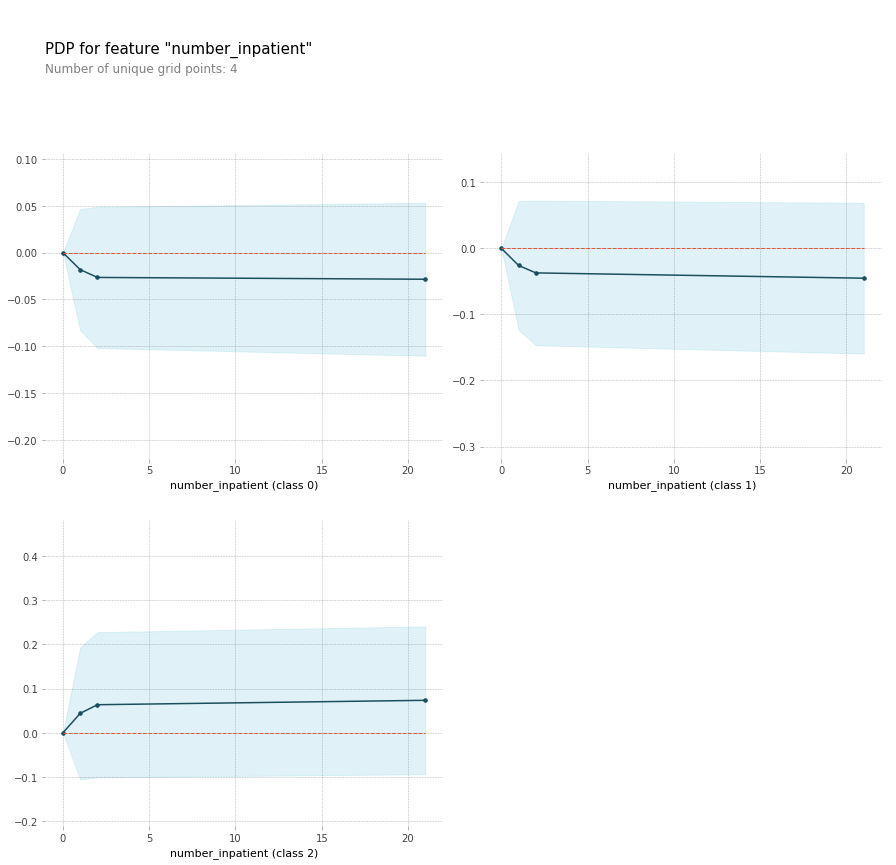

In [67]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_to_plot = 'number_inpatient'
pdp_dist = pdp.pdp_isolate(model=model, dataset=val_X, model_features=val_X.columns.tolist(), feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()